# Mapper tutorial

In this notebook, we'll go through several examples of how Mapper can be used. Here we use the Kepler Mapper implementation at [scikit-tda/kepler-mapper](https://github.com/scikit-tda/kepler-mapper), but there are several other packages one can use: [tda-mapper-py](https://github.com/mirkoklukas/tda-mapper-py), and [Python mapper](http://danifold.net/mapper/index.html) to name two. 

**Note: This notebook requires kepler-mapper. If you haven't installed this already, you can install it via** `pip install kmapper`**, which should install all other required dependencies.**

### Synthetic Examples 

Let's re-do the basic examples from the persistent homology discussion. We consider the standard and noisy circles as before.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import kmapper as km
import kmapper.jupyter
import sklearn
import warnings
warnings.filterwarnings('ignore')

std_cir = np.loadtxt("Data/synth_data1.txt",delimiter=" ")
noisy_cir = np.loadtxt("Data/synth_data2.txt",delimiter=" ")

What would a good filter be for these data sets? Projection onto an axis? Distance from the origin? Eccentricity? Nearest neighbors?

We start with the simplest filter by projecting onto the x-axis for both data sets.

In [2]:
# Initialize.
mapper = km.KeplerMapper()

# Build the filtered data.
projected_cir = mapper.fit_transform(std_cir, projection=[0]) # project onto x-axis
projected_noisy_cir = mapper.fit_transform(noisy_cir,projection=[0])

Now build the mapper graph using the projected data points, the original data points, and a cover. Feel free to mess with the number of open sets covering the image, along with their overlap.

In [3]:
graph_cir = mapper.map(projected_cir, std_cir, cover=km.Cover(n_cubes=10,perc_overlap=0.7)) 
mapper.visualize(graph_cir, path_html="Output/std_cir_mapper.html",
                 title="Standard Circle")

# Show the mapper output locally.
km.jupyter.display(path_html="Output/std_cir_mapper.html") 

(If you're reading along the html file, you can find these widgets as html files in the [Output/Test_output](Test_output) directory)

The output generally looks like a circle, so that's reassuring. What about for the noisy circle?

In [ ]:
graph_noisy_cir = mapper.map(projected_noisy_cir, noisy_cir, cover=km.Cover(n_cubes=10,perc_overlap=0.7)) 
mapper.visualize(graph_noisy_cir, path_html="Output/noisy_cir_mapper.html",
                 title="Noisy Circle")

# Show the mapper output locally.
km.jupyter.display(path_html="Output/noisy_cir_mapper.html") 

This is alright, but seems like it has too many connections between the nodes to really be a circle. Let's re-do the computation by increasing the number of open sets in the cover.

In [ ]:
graph_noisy_cir2 = mapper.map(projected_noisy_cir, noisy_cir, cover=km.Cover(n_cubes=20,perc_overlap=0.7)) 
mapper.visualize(graph_noisy_cir2, path_html="Output/noisy_cir2_mapper.html",
                 title="Noisy Circle, take 2")

# Show the mapper output locally.
km.jupyter.display(path_html="Output/noisy_cir2_mapper.html") 

That looks better to me. In general, trying lots of different filters and covers can be very helpful in obtaining something meaningful. 

## Slightly less trivial examples

Let's move beyond basic topological objects to some more interesting spaces. 

In [4]:
animal1 = np.genfromtxt('Data/animal1.csv', delimiter=',')
projected_animal1 = mapper.fit_transform(animal1,projection=[0,2]) # project onto X-Y plane

# Specify a specific clustering algorithm as well as cover.
graph = mapper.map(projected_animal1, animal1, clusterer=sklearn.cluster.DBSCAN(eps=0.1, min_samples=5), cover=km.Cover(15, 0.4))

mapper.visualize(graph, path_html="Output/animal1_projXY.html", title="Mystery animal 1, projected onto Y-axis",custom_tooltips=np.arange(len(projected_animal1)))

# Show the mapper output locally.
km.jupyter.display(path_html="Output/animal1_projXY.html") 

Is it a blob? Before moving, try to change some parameters on your own and see if you can figure out what it is. Remember you can change the cover parameters (_number of open intervals_ and _overlap percentage_) and the filter function (_projection onto an axis_ `projection=[#,#]`_, l2 norm_ `projection='l2norm'`_, or maybe_ `projection='dist_mean'`_)._ 


---
---


Let's try messing with the filter function a bit. What if we do something naive, like sum the coordinates?

In [5]:
projected_animal1 = mapper.fit_transform(animal1) # The default is to sum the coordinates.

# Same as before
graph = mapper.map(projected_animal1, animal1, clusterer=sklearn.cluster.DBSCAN(eps=0.1, min_samples=5), cover=km.Cover(20, 0.4))

mapper.visualize(graph, path_html="Output/animal1_sum.html", title="Mystery animal 1, coordinates summed",custom_tooltips=np.arange(len(projected_animal1)))

# Show the mapper output locally.
km.jupyter.display(path_html="Output/animal1_sum.html") 

This looks like an animal with several legs. So maybe we were projecting onto the wrong axis before...

In [6]:
projected_animal1 = mapper.fit_transform(animal1,projection=[1,2]) # The default is to sum the coordinates.

# Same as before
graph = mapper.map(projected_animal1, animal1, clusterer=sklearn.cluster.DBSCAN(eps=0.1, min_samples=5), cover=km.Cover(20, 0.4))

mapper.visualize(graph, path_html="Output/animal1_projYZ.html", title="Mystery animal 1, projected onto Z axis",custom_tooltips=np.arange(len(projected_animal1)))

# Show the mapper output locally.
km.jupyter.display(path_html="Output/animal1_projYZ.html") 

And just to be sure, lets plot a projection of the original data.

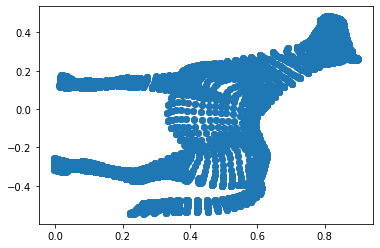

In [7]:
plt.scatter(animal1[:,1],animal1[:,2])

---
Alright, one more animal.

In [8]:
animal2 = np.genfromtxt('Data/animal2.csv', delimiter=',')
projected_animal2 = mapper.fit_transform(animal2,projection=[1,2]) # project onto X-Y plane

# Same as before
graph = mapper.map(projected_animal2, animal2, clusterer=sklearn.cluster.DBSCAN(eps=0.1, min_samples=5), cover=km.Cover(20, 0.4))

mapper.visualize(graph, path_html="Output/animal2_projYZ.html", title="Mystery animal 2, projected onto Z axis",custom_tooltips=np.arange(len(projected_animal1)))

# Show the mapper output locally.
km.jupyter.display(path_html="Output/animal2_projYZ.html") 

It seems like the gravity controls aren't working in the notebook, so maybe we should open it externally: [Output/animal2_projYZ.html](Output/animal2_projYZ.html).

And we can again check with the projection.

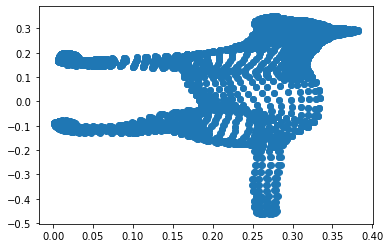

In [9]:
plt.scatter(animal2[:,1],animal2[:,2])

### A more complicated example

The interested reader should work through the MNIST example involving t-SNE on the [https://github.com/scikit-tda/kepler-mapper/blob/master/examples/digits/digits.ipynb](Kepler-Mapper website). For the rest of us, let's try to understand how powerful these methods are by looking at the [Output/keplermapper_digits_custom_tooltips.html](Output).